<a href="https://colab.research.google.com/github/jibook/git-remote/blob/master/TensorFlow_11_Deep_Learning_for_text_and_sequences.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Word-level one-hot encoding

In [ ]:
import numpy as np 
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
token_index = {} 
for sample in samples:
  for word in sample.split(): 
    if word not in token_index: 
      token_index[word] = len(token_index) + 1 

max_length = 10 

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples): 
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = token_index.get(word) 
    results[i, j, index] = 1.

- Character-level one-hot encoding

In [ ]:
import string 

samples = ['The cat sat on the mat.', 'The dog ate my homework.']
characters = string.printable 
token_index = dict(zip(range(1, len(characters) + 1), characters)) 

max_length = 50 
results = np.zeros((len(samples), max_length, max(token_index.keys()) + 1))
for i, sample in enumerate(samples): 
  for j, character in enumerate(sample): 
    index = token_index.get(character) 
    results[i, j, index] = 1.

- Using Keras for word-level one-hot encoding

In [ ]:
from keras.preprocessing.text import Tokenizer 
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
tokenizer = Tokenizer(num_words=1000) 
tokenizer.fit_on_texts(samples) 
sequences = tokenizer.texts_to_sequences(samples) 
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


- Word-level one-hot encoding with hash trick

In [ ]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.'] 
dimensionality = 1000 
max_length = 10 
results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
  for j, word in list(enumerate(sample.split()))[:max_length]:
    index = abs(hash(word)) % dimensionality 
    results[i, j, index] = 1.

- Instantiating an Embedding layer

In [ ]:
from keras.layers import Embedding 
embedding_layer = Embedding(1000,64) # no. of possible token(1000: 1+maximum word index) and dim. of embedding

- Loading the IMDB data for use with an Embedding layer

In [ ]:
from keras.datasets import imdb
from keras import preprocessing 

max_features = 10000 
maxlen = 20 

(x_train, y_train), (x_test, y_test) = imdb.load_data( num_words=max_features)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen= maxlen)
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


- Using an Embedding layer and classifier on the IMDB data

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense 
model = Sequential() 
model.add(Embedding(10000, 8, input_length=maxlen)) 
model.add(Flatten()) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary() 
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 8)             80000     
                                                                 
 flatten (Flatten)           (None, 160)               0         
                                                                 
 dense (Dense)               (None, 1)                 161       
                                                                 
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 4s 3ms/step - loss: 0.6668 - acc: 0.6316 - val_loss: 0.6134 - val_acc: 0.7058
Epoch 2/10
625/625 [==============================] - 1s 2ms/step - loss: 0.5383 - acc: 0.7538 - val_loss: 0.5226 - val_acc: 0.7322
Epoch 3/10
625/625 [==============================] 

- Processing the labels of the raw IMDB data

In [ ]:
!unzip aclImdb.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: aclImdb/train/pos/9260_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._9260_7.txt  
  inflating: aclImdb/train/pos/1599_7.txt  
  inflating: __MACOSX/aclImdb/train/pos/._1599_7.txt  
  inflating: aclImdb/train/pos/2174_8.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2174_8.txt  
  inflating: aclImdb/train/pos/2309_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2309_9.txt  
  inflating: aclImdb/train/pos/12034_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._12034_10.txt  
  inflating: aclImdb/train/pos/11703_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._11703_9.txt  
  inflating: aclImdb/train/pos/5619_9.txt  
  inflating: __MACOSX/aclImdb/train/pos/._5619_9.txt  
  inflating: aclImdb/train/pos/2928_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._2928_10.txt  
  inflating: aclImdb/train/pos/7096_10.txt  
  inflating: __MACOSX/aclImdb/train/pos/._7096_10.txt  
  inflating: aclImdb/train/pos/793_9.txt  
  inflating: __MACOS

In [ ]:
import os 
imdb_dir = './aclImdb'
train_dir = os.path.join(imdb_dir, 'train') 
labels = [] 
texts = [] 
for label_type in ['neg', 'pos']: 
  dir_name = os.path.join(train_dir, label_type)
  for fname in os.listdir(dir_name): 
    if fname[-4:] == '.txt': 
      f = open(os.path.join(dir_name, fname))
      texts.append(f.read()) 
      f.close() 
      if label_type == 'neg': 
        labels.append(0)
      else: 
        labels.append(1)

In [ ]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences 
import numpy as np 

maxlen = 100
training_samples = 200 
validation_samples = 10000
max_words = 10000 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts) 
sequences = tokenizer.texts_to_sequences(texts) 
word_index = tokenizer.word_index 
print('Found %s unique tokens.' % len(word_index))
data = pad_sequences(sequences, maxlen=maxlen)

Found 88582 unique tokens.


In [ ]:
labels = np.asarray(labels) 
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape) 
indices = np.arange(data.shape[0])
np.random.shuffle(indices) 
data = data[indices] 
labels = labels[indices] 
x_train = data[:training_samples] 
y_train = labels[:training_samples] 
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [ ]:
!unzip glove.6B.100d.txt.zip

Archive:  glove.6B.100d.txt.zip
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: glove.6B.100d.txt       A



In [ ]:
glove_dir = './glove.6B.100d.txt' 

embeddings_index = {} 
f = open(os.path.join('glove.6B.100d.txt'))
for line in f: 
  values = line.split() 
  word = values[0] 
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs 
f.close() 

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 100 

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items(): 
  if i < max_words: 
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None: 
      embedding_matrix[i] = embedding_vector

In [ ]:
from keras.models import Sequential 
from keras.layers import Embedding, Flatten, Dense 
model = Sequential() 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten()) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                320032    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers[0].set_weights([embedding_matrix]) 
model.layers[0].trainable = False

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_data=(x_val, y_val)) 
model.save_weights('pre_trained_glove_model.h5')

Epoch 1/10
7/7 [==============================] - 2s 179ms/step - loss: 1.3825 - acc: 0.5050 - val_loss: 1.6598 - val_acc: 0.5066
Epoch 2/10
7/7 [==============================] - 1s 225ms/step - loss: 0.7215 - acc: 0.7000 - val_loss: 0.7344 - val_acc: 0.5341
Epoch 3/10
7/7 [==============================] - 1s 224ms/step - loss: 0.4898 - acc: 0.7400 - val_loss: 0.9536 - val_acc: 0.5124
Epoch 4/10
7/7 [==============================] - 1s 223ms/step - loss: 0.2504 - acc: 0.9150 - val_loss: 1.4086 - val_acc: 0.5148
Epoch 5/10
7/7 [==============================] - 1s 132ms/step - loss: 0.8197 - acc: 0.7150 - val_loss: 0.7570 - val_acc: 0.5557
Epoch 6/10
7/7 [==============================] - 1s 136ms/step - loss: 0.0864 - acc: 1.0000 - val_loss: 0.8846 - val_acc: 0.5451
Epoch 7/10
7/7 [==============================] - 1s 127ms/step - loss: 0.0826 - acc: 0.9950 - val_loss: 0.8134 - val_acc: 0.5523
Epoch 8/10
7/7 [==============================] - 1s 221ms/step - loss: 0.0399 - acc: 1.00

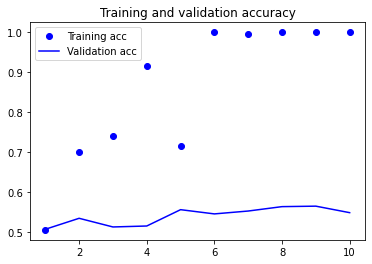

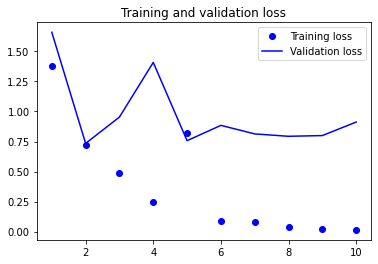

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()

In [ ]:
from keras.models import Sequential 
from keras.layers import Embedding, Flatten, Dense 
model = Sequential() 
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten()) 
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.summary() 
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, 
 epochs=10, 
 batch_size=32, 
 validation_data=(x_val, y_val))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1000000   
                                                                 
 flatten_2 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 32)                320032    
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 4s 297ms/step - loss: 0.6888 - acc: 0.5150 - val_loss: 0.6944 - val_acc: 0.5248
Epoch 2/10
7/7 [==============================

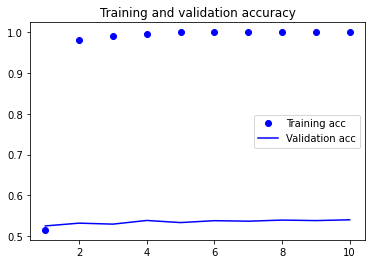

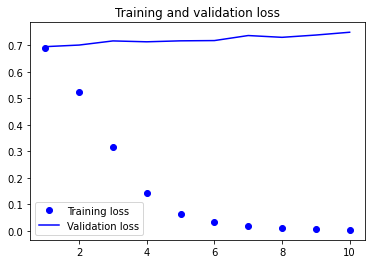

In [ ]:
import matplotlib.pyplot as plt 
acc = history.history['acc'] 
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1) 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend() 
plt.figure() 
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.legend() 
plt.show()